# **About Dataset**

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD (Central Bussiness District) in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

CouncilArea: Governing council for the area

In [83]:
# Importing libraries and modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Reading the file into a dataframe
house_df = pd.read_csv('/content/drive/MyDrive/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [85]:
# Looking at the first 5 entries
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [86]:
# Get a quick information about the dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [87]:
# Checking number of Unique attributes of each column
house_df.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [88]:
# we need to check irrelavent spaces in the column names because,
# Even one space in the column name will create a confusion in the future
house_df.columns
# Fortunately we didn't have any space

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [89]:
# Checking the null values
house_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [90]:
# Drop the rows with null values
house_df.dropna(inplace= True)

# **Exploratory Data Analysis**

<Axes: >

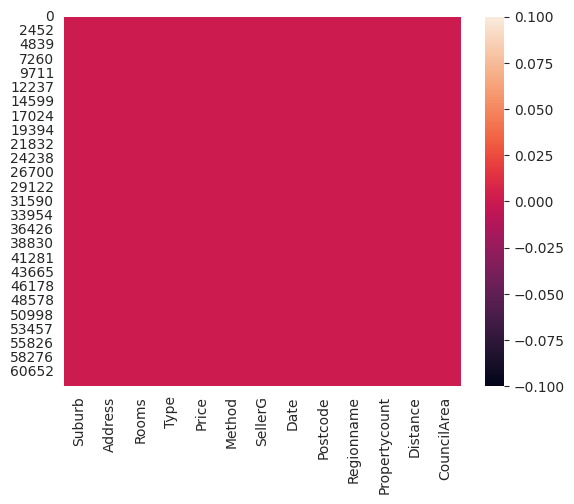

In [91]:
sns.heatmap(house_df.isnull())

In [92]:
# Checking for duplicates
house_df.duplicated().sum()

1

In [93]:
# Dropping Duplicates
house_df.drop_duplicates(inplace = True)

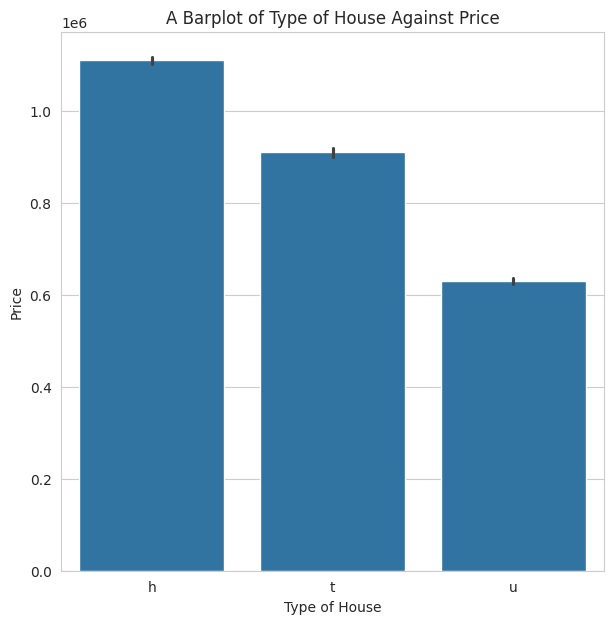

In [94]:
# Showing the relationship between the type of house and prices
plt.figure(figsize=(7,7))
sns.barplot(data=house_df, x='Type', y='Price').set(title='A Barplot of Type of House Against Price', xlabel='Type of House');

From the above chart, we can able to see that the type of House or building has a significant impact of price since the type of building can lead to a high or low price of the house

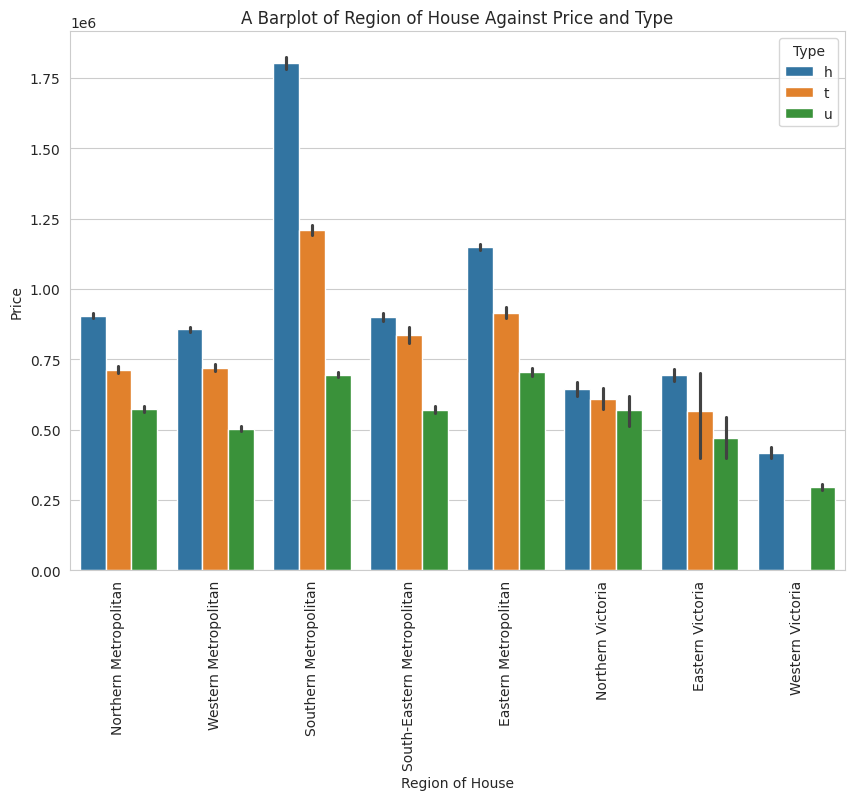

In [95]:
# Checking prices in relation with region names
plt.figure(figsize=(10,7))
sns.barplot(data=house_df, x='Regionname', y='Price', hue='Type').set(title='A Barplot of Region of House Against Price and Type', xlabel='Region of House')
plt.xticks(rotation=90);

From the Chart above, we can infer that the region of a particular building really affects the price on the house

For example, the average price of house, cottage, villa, semi terrace is really high in the Southern Metropolitan as compared to the average price of same building in the other regions

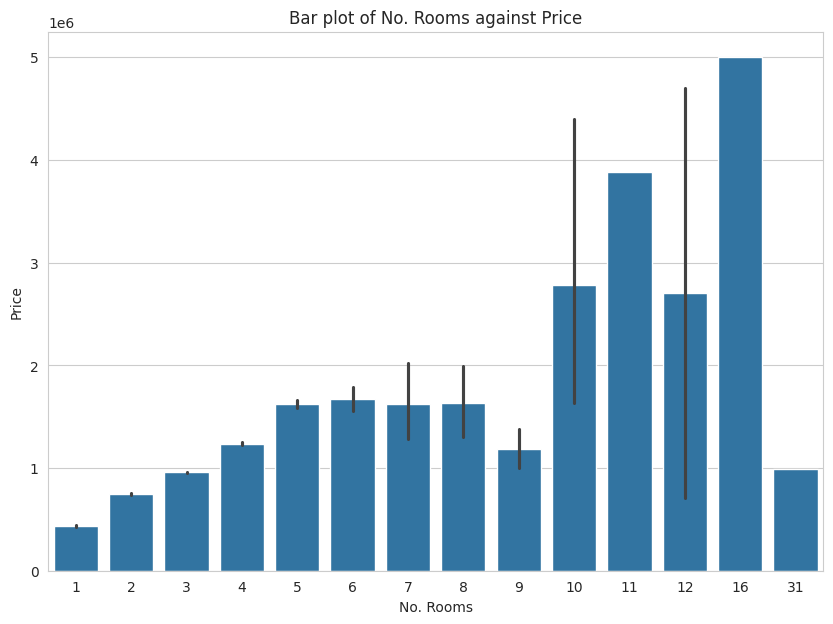

In [96]:
# Plotting the relationship between Rooms and Price
plt.figure(figsize=(10,7))
sns.barplot(data = house_df,x='Rooms',y='Price').set(title = 'Bar plot of No. Rooms against Price',xlabel = 'No. Rooms')
plt.show()

From this chart we can see Number of Rooms slightly affects the Price.

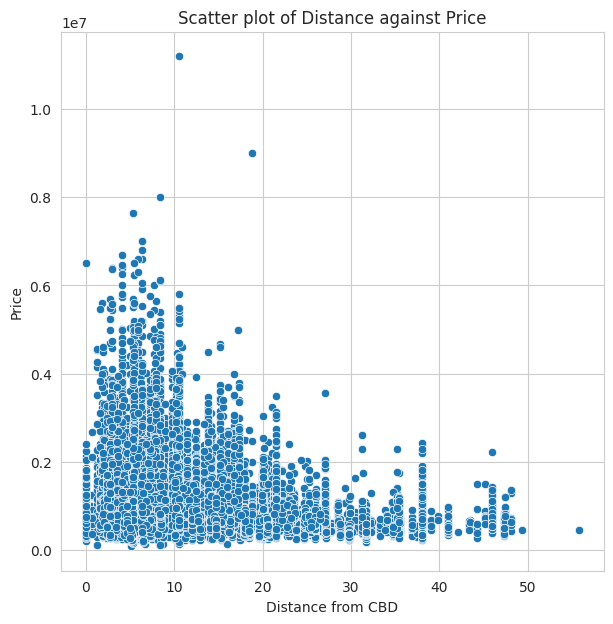

In [97]:
# Plotting the relationship between Distance from CBD and Price
plt.figure(figsize=(7,7))
sns.scatterplot(data = house_df,x='Distance',y='Price').set(title = 'Scatter plot of Distance against Price',xlabel = 'Distance from CBD')
plt.show()

From the above chart we can understand prices are increasing while the Distance from the central bussiness district is decreasing

# **Data Preprocessing**

In [98]:
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [99]:
# Some of the columns are not helpful for creation of the model so it should be dropped
columns_to_be_dropped = ['Suburb','Address','Method','SellerG','Propertycount','CouncilArea','Date']
house_df.drop(columns_to_be_dropped,axis = 'columns' ,inplace = True)
house_df.head()

,Rooms,Type,Price,Postcode,Regionname,Distance
0,3,h,1490000.0,3067,Northern Metropolitan,3.0
1,3,h,1220000.0,3067,Northern Metropolitan,3.0
2,3,h,1420000.0,3067,Northern Metropolitan,3.0
3,3,h,1515000.0,3040,Western Metropolitan,7.5
4,2,h,670000.0,3042,Western Metropolitan,10.4


In [100]:
# Converting the type column to numerical values
le = LabelEncoder()
house_df['Type'] = le.fit_transform(house_df['Type'].values)

In [101]:
# Create dummy variables for categorical variables
dummies = pd.get_dummies(house_df['Regionname'], drop_first=True)

In [102]:
# Concatinating the dummy variables with the dataframe
house_df = pd.concat([house_df, dummies], axis=1)

# Dropping the original Region name column
house_df.drop('Regionname', axis = 1, inplace=True)

In [103]:
house_df.head()

,Rooms,Type,Price,Postcode,Distance,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,3,0,1490000.0,3067,3.0,False,True,False,False,False,False,False
1,3,0,1220000.0,3067,3.0,False,True,False,False,False,False,False
2,3,0,1420000.0,3067,3.0,False,True,False,False,False,False,False
3,3,0,1515000.0,3040,7.5,False,False,False,False,False,True,False
4,2,0,670000.0,3042,10.4,False,False,False,False,False,True,False


# **Model Evaluation**

In [104]:
# Choosing features and target variables
features = house_df.drop('Price',axis=1)
target = house_df['Price']

In [105]:
# Split the datasets into train and test data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [106]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [107]:
y_pred = LR_model.predict(x_test)
y_pred

array([1326294.50833542,  602843.92168032,  700947.19755644, ...,
       1029134.30285589,   41259.37718864, 1044633.32076074])

In [108]:
# Checking the Accuracy of the model
mae_LR = mean_absolute_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, y_pred)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_pred)

In [109]:
print("Mean Absolute Error (MAE):", mae_LR)
print("Mean Squared Error (MSE):", mse_LR)
print("Root Mean Squared Error (RMSE):", rmse_LR)
print("R-squared (R2):", r2_LR)

Mean Absolute Error (MAE): 270459.55252852594
Mean Squared Error (MSE): 170502541239.40036
Root Mean Squared Error (RMSE): 412919.5336132699
R-squared (R2): 0.5132226196734018


In [110]:
# Applying RandomForestRegressor Algorithm
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,max_depth=20,random_state=42)
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [111]:
y_pred1 = RFR.predict(x_test)
y_pred1

array([1565083.73575534,  843828.69028194,  530935.27396115, ...,
        900581.14336214,  427041.87734488, 1003461.85531363])

In [112]:
# Checking the Accuracy of the model
mae_RFR = mean_absolute_error(y_test, y_pred1)
mse_RFR = mean_squared_error(y_test, y_pred1)
rmse_RFR = np.sqrt(mse_RFR)
r2_RFR = r2_score(y_test, y_pred1)

In [113]:
print("Mean Absolute Error (MAE):", mae_RFR)
print("Mean Squared Error (MSE):", mse_RFR)
print("Root Mean Squared Error (RMSE):", rmse_RFR)
print("R-squared (R2):", r2_RFR)

Mean Absolute Error (MAE): 185856.42400719432
Mean Squared Error (MSE): 105982655047.79976
Root Mean Squared Error (RMSE): 325549.77353363304
R-squared (R2): 0.6974241040091671


In [114]:
# Applying DecisionTreeRegressor Algorithm
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=10)  # You can adjust max_depth for controlling tree depth
DTR.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [115]:
y_pred2 = DTR.predict(x_test)
y_pred2

array([1555852.94117647,  817000.        ,  585884.31653992, ...,
        901204.66321244,  384276.74418605, 1000548.46235294])

In [116]:
# Checking the Accuracy of the model
mae_DTR = mean_absolute_error(y_test, y_pred2)
mse_DTR = mean_squared_error(y_test, y_pred2)
rmse_DTR = np.sqrt(mse_DTR)
r2_DTR = r2_score(y_test, y_pred2)

In [117]:
print("Mean Absolute Error (MAE):", mae_DTR)
print("Mean Squared Error (MSE):", mse_DTR)
print("Root Mean Squared Error (RMSE):", rmse_DTR)
print("R-squared (R2):", r2_DTR)

Mean Absolute Error (MAE): 191826.98275853586
Mean Squared Error (MSE): 111593160483.26451
Root Mean Squared Error (RMSE): 334055.6248340454
R-squared (R2): 0.6814063536675519


# **Sample Prediction**

In [118]:
# Giving the Values for Prediction
Rooms=3
Type=1
Postcode=3075
Distance=5.0
Eastern_Victoria=True
Northern_Metropolitan=False
Northern_Victoria=True
SouthEastern_Metropolitan=False
Southern_Metropolitan=False
Western_Metropolitan=False
Western_Victoria=False

In [119]:
# Predicting the Output House Price
input_data = np.array([[Rooms,Type,Postcode,Distance,Eastern_Victoria,Northern_Metropolitan,Northern_Victoria,SouthEastern_Metropolitan,Southern_Metropolitan,Western_Metropolitan,Western_Victoria]])
predicted_output = RFR.predict(input_data)
predicted_output

array([1017342.74681759])

**Determining the Best Regressor Model:**

In this study, we evaluated three regressor models—Linear Regression, Decision Tree Regressor, and Random Forest Regressor—on our dataset to determine the most suitable model for predicting our target variable. Our analysis revealed the following insights:

Performance Comparison:

**Linear Regression**: Despite its simplicity, Linear Regression struggled to capture the non-linear relationships present in the data, resulting in mediocre predictive performance.

**Decision Tree Regressor**: The Decision Tree Regressor exhibited better flexibility in capturing non-linear relationships compared to Linear Regression.

**Random Forest Regressor**: The Random Forest Regressor demonstrated superior predictive performance compared to both Linear Regression and Decision Tree Regressor.

**Overall Recommendation**: Based on our evaluation,the **Random Forest Regressor** emerges as the most suitable model for predicting our target variable. It combines the strengths of decision trees with ensemble learning, resulting in superior predictive performance.